In [7]:
import pandas as pd, seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
seaborn.set_theme()

# ANALYSIS OF ETHEREUM BLOCKS AND TRANSACTIONS

The data are downloaded from the https://etherscan.io/charts website. 

In [25]:
filePathBlockCountCSV = "export-BlockCountRewards.csv"
filePathBlockSizeCSV = "export-BlockSize.csv"
filePathGasLimitCSV = "export-GasLimit.csv"
filePathGasUsedCSV = "export-GasUsed.csv"
filePathTxGrowthCSV = "export-TxGrowth.csv"
filePathEtherPriceCSV = "export-EtherPrice.csv"

In [26]:
dataBlockCount = pd.read_csv(filePathBlockCountCSV)
dataBlockSize = pd.read_csv(filePathBlockSizeCSV)
dataGasLimit = pd.read_csv(filePathGasLimitCSV)
dataGasUsed = pd.read_csv(filePathGasUsedCSV)
dataTxGrowth = pd.read_csv(filePathTxGrowthCSV)
dataEtherPrice = pd.read_csv(filePathEtherPriceCSV)

In [27]:
# Convert Date(UTC) column into appropriate Datetime format.
dataBlockCount['Date(UTC)'] = pd.to_datetime(dataBlockCount['Date(UTC)'], format='%m/%d/%Y')
dataBlockSize['Date(UTC)'] = pd.to_datetime(dataBlockSize['Date(UTC)'], format='%m/%d/%Y')
dataGasLimit['Date(UTC)'] = pd.to_datetime(dataGasLimit['Date(UTC)'], format='%m/%d/%Y')
dataGasUsed['Date(UTC)'] = pd.to_datetime(dataGasUsed['Date(UTC)'], format='%m/%d/%Y')
dataTxGrowth['Date(UTC)'] = pd.to_datetime(dataTxGrowth['Date(UTC)'], format='%m/%d/%Y')
dataEtherPrice['Date(UTC)'] = pd.to_datetime(dataEtherPrice['Date(UTC)'], format='%m/%d/%Y')

# Amount of blocks per day

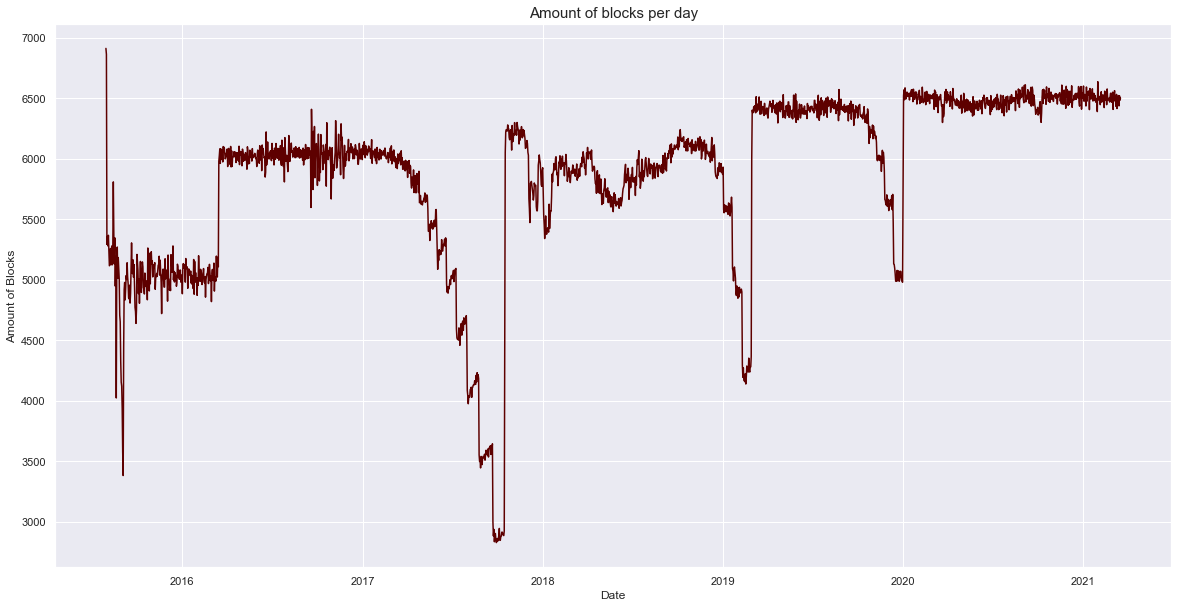

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Amount of blocks per day", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Amount of Blocks")
ax.plot(dataBlockCount["Date(UTC)"], dataBlockCount["Value"], color="#5e0000")

# Block size per day

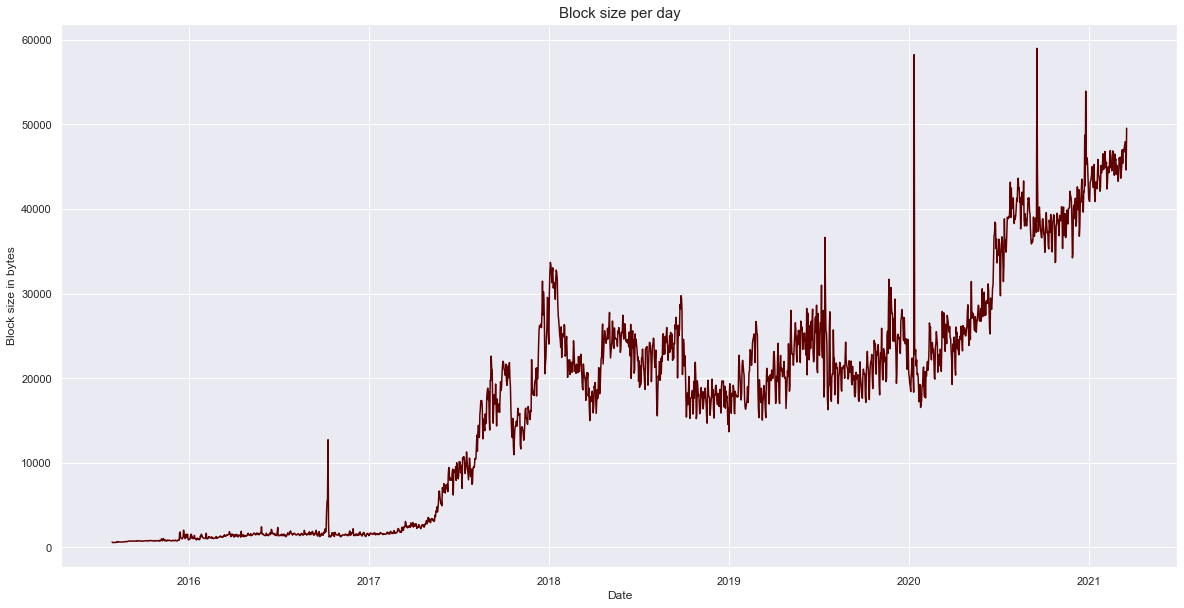

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Block size per day", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Block size in bytes")
ax.plot(dataBlockSize["Date(UTC)"], dataBlockSize["Value"], color="#5e0000")

# Ether price per day

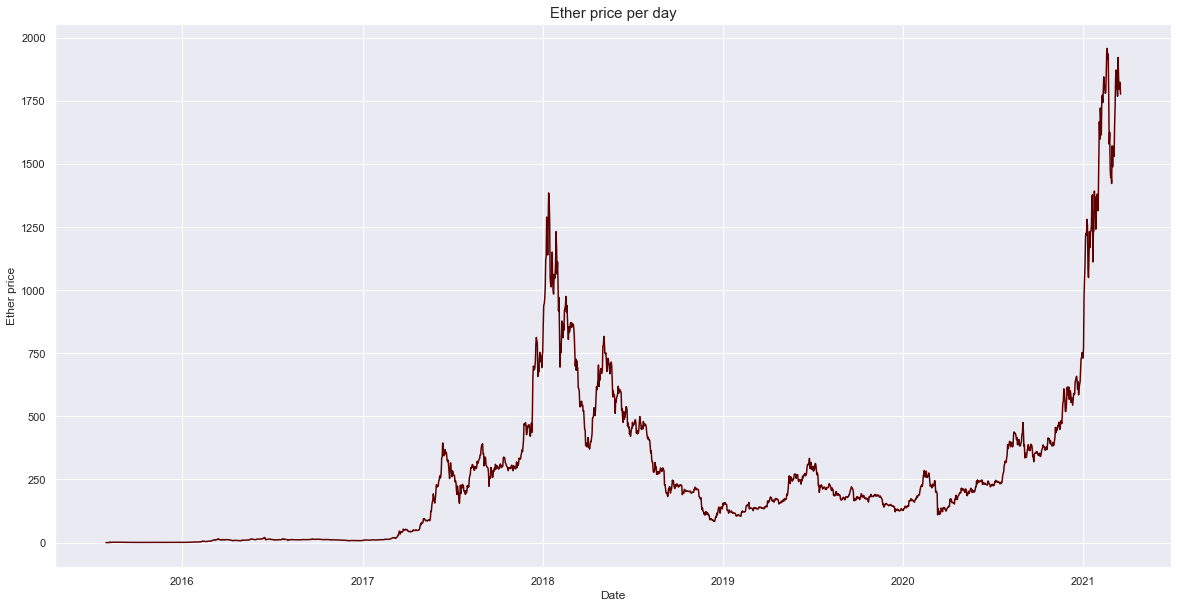

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Ether price per day", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Ether price")
ax.plot(dataEtherPrice["Date(UTC)"], dataEtherPrice["Value"], color="#5e0000")

# Amount of transactions per day

In [149]:
windowedAverageTxPerDay = dataTxGrowth["Value"].rolling(100).mean()

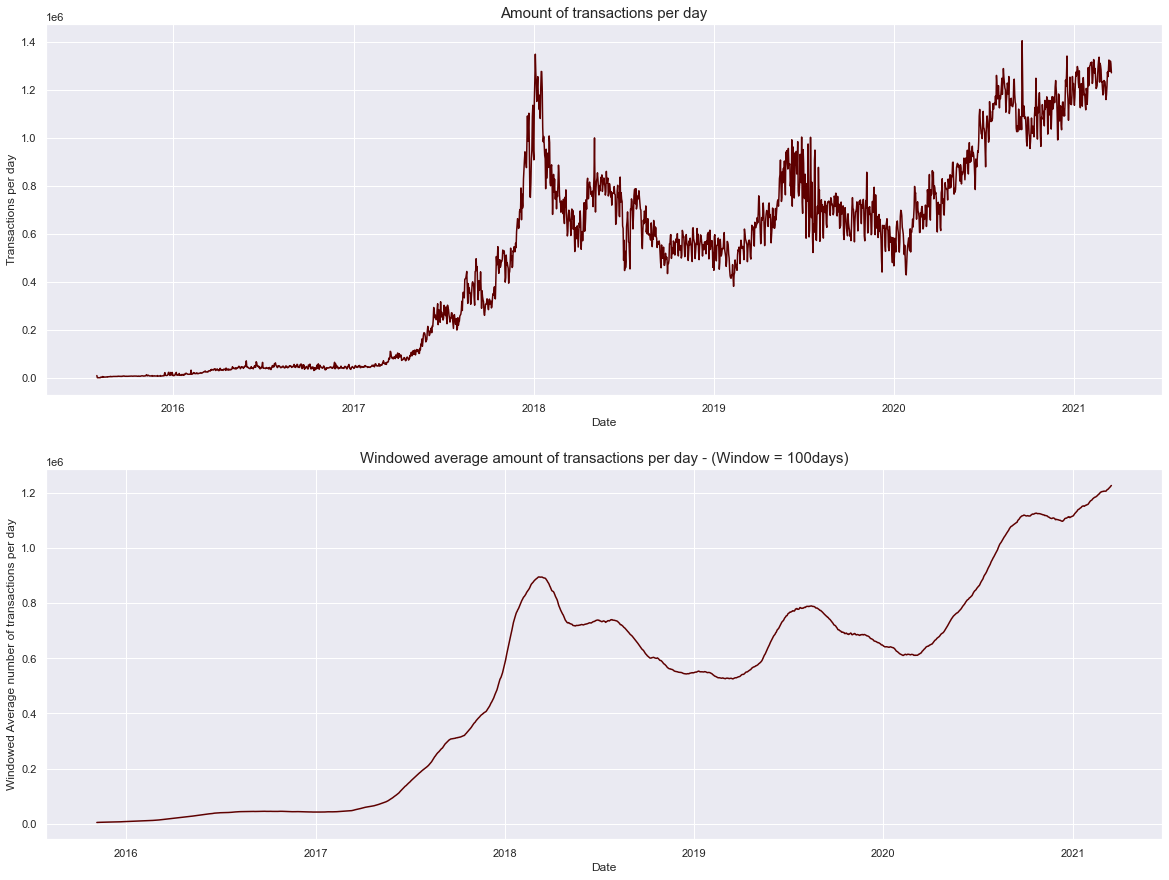

In [151]:
fig, axs = plt.subplots(2, figsize=(20,15))

axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[0].set_title("Amount of transactions per day", fontsize=15)
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Transactions per day")
axs[0].plot(dataTxGrowth["Date(UTC)"], dataTxGrowth["Value"], color="#5e0000")

axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1].set_title("Windowed average amount of transactions per day - (Window = 100days)", fontsize=15)
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Windowed Average number of transactions per day")
axs[1].plot(dataBlockAndTx["Date(UTC)"], windowedAverageTxPerDay, color="#5e0000")

## Correlation between Ether price and Amount of transactions per day

In [125]:
dataTxGrowth["Value"].corr(dataEtherPrice["Value"], "pearson")

0.7106644864395446

The Ether price is very much correlated to the amount of transactions per day. Bitcoin is different as the number of transactions per day isn't correlated with its price. It shows that the more Ethereum is used the more the price goes up.

## Comparison with Bitcoin

In [119]:
filePathBitcoinPriceCSV = "btc-price.csv"
filePathBitcoinTransactionsCountCSV = "btc-transactions.csv"

In [120]:
dataBitcoinPrice = pd.read_csv(filePathBitcoinPriceCSV)
dataBitcoinTransactionsCount = pd.read_csv(filePathBitcoinTransactionsCountCSV)

In [121]:
dataBitcoinPrice['Date'] = pd.to_datetime(dataBitcoinPrice['Date'], format='%Y-%m-%d')
dataBitcoinTransactionsCount['Date'] = pd.to_datetime(dataBitcoinTransactionsCount['Date'], format='%Y-%m-%d')

dataBitcoinPrice = dataBitcoinPrice[(dataBitcoinPrice['Date'] > '2015-01-01')]
dataBitcoinTransactionsCount = dataBitcoinTransactionsCount[(dataBitcoinTransactionsCount['Date'] > '2015-01-01')]

dataBitcoinPrice = dataBitcoinPrice.reindex(index=dataBitcoinPrice.index[::-1])
dataBitcoinTransactionsCount = dataBitcoinTransactionsCount.reindex(index=dataBitcoinTransactionsCount.index[::-1])

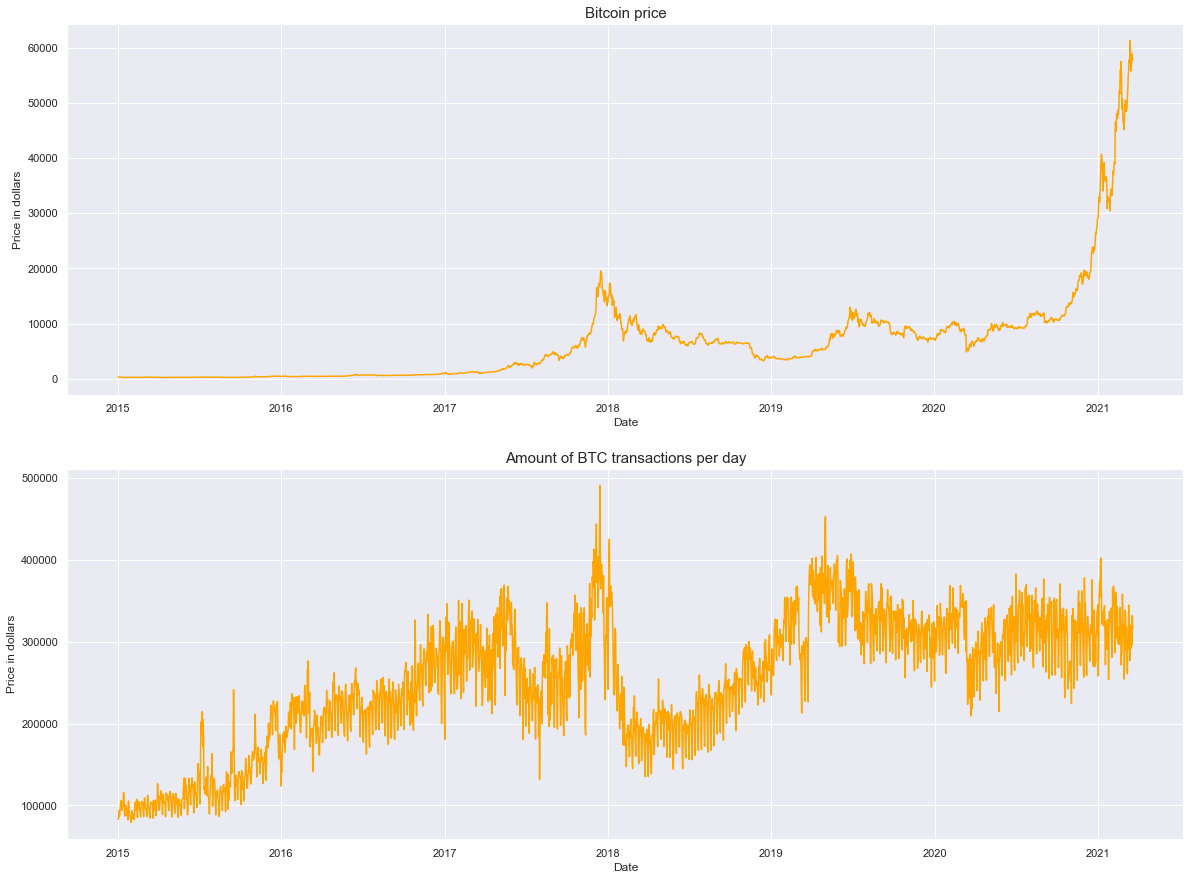

In [128]:
fig, axs = plt.subplots(2,figsize=(20,15))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[0].set_title("Bitcoin price", fontsize=15)
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price in dollars")
axs[0].plot(dataBitcoinPrice["Date"], dataBitcoinPrice["Value"], color="orange")

axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1].set_title("Amount of BTC transactions per day", fontsize=15)
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Price in dollars")
axs[1].plot(dataBitcoinTransactionsCount["Date"], dataBitcoinTransactionsCount["Value"], color="orange")

## Correlation between Bitcoin price and Amount of BTC transactions per day

In [117]:
dataBitcoinTransactionsCount["Value"].corr(dataBitcoinPrice["Value"], "pearson")

0.4300641233940695

## Windowed amount of BTC transactions

In [136]:
windowedAverageBTCTx = dataBitcoinTransactionsCount["Value"].rolling(100).mean()

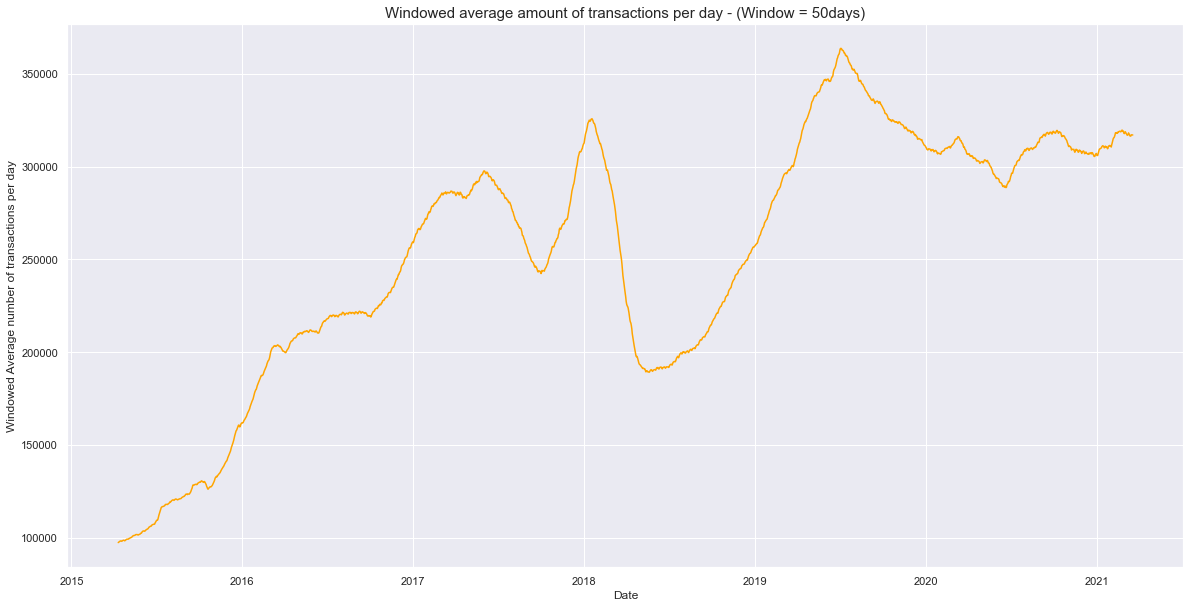

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Windowed average amount of transactions per day - (Window = 50days)", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Windowed Average number of transactions per day")
ax.plot(dataBitcoinTransactionsCount["Date"], windowedAverageBTCTx, color="orange")

# Amount of transactions per second

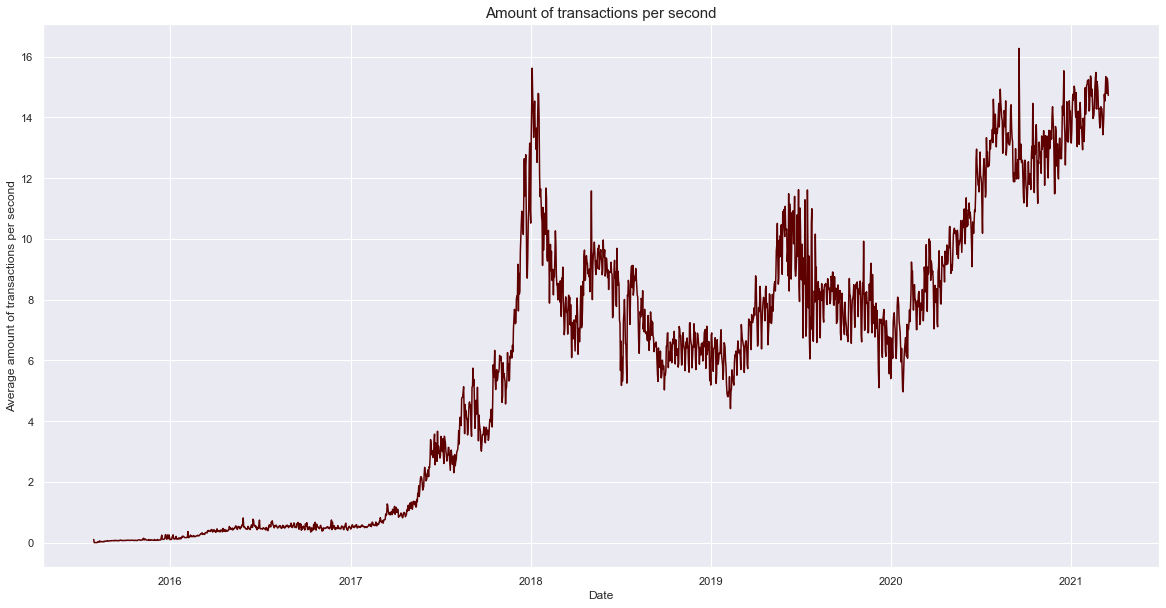

In [153]:
fig, ax = plt.subplots(figsize=(20,10))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Amount of transactions per second", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Average amount of transactions per second")
ax.plot(dataTxGrowth["Date(UTC)"], dataTxGrowth["Value"]/(24*60*60), color="#5e0000")


# Amount of transactions per block

In [37]:
dataBlockAndTx = pd.merge(dataBlockCount, dataTxGrowth, on=["Date(UTC)"])
dataBlockAndTx = dataBlockAndTx.drop(["UnixTimeStamp_x","UnixTimeStamp_y"], "columns")
dataBlockAndTx.columns = ["Date(UTC)", "BlockCount", "TxCount"]

In [39]:
dataBlockAndTx["TxPerBlock"] = dataBlockAndTx["TxCount"] / dataBlockAndTx["BlockCount"]

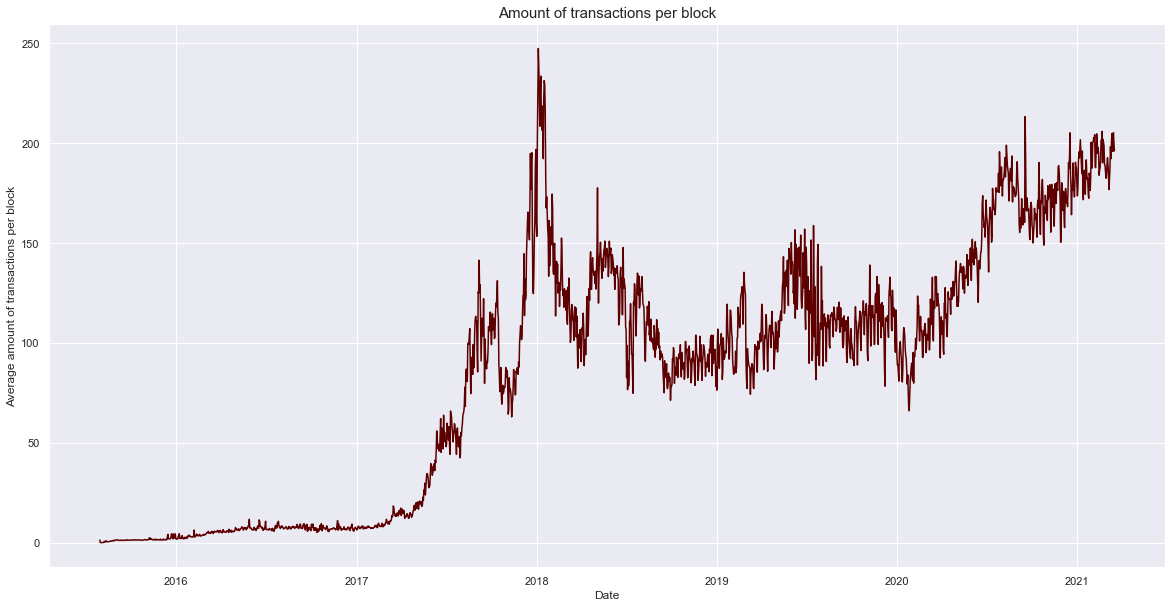

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Amount of transactions per block", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Average amount of transactions per block")
ax.plot(dataBlockAndTx["Date(UTC)"], dataBlockAndTx["TxPerBlock"], color="#5e0000")

# Average transaction size

In [44]:
dataBlockSizeAndTx = pd.merge(dataBlockSize, dataTxGrowth, on=["Date(UTC)"])
dataBlockSizeAndTx = dataBlockSizeAndTx.drop(["UnixTimeStamp_x","UnixTimeStamp_y"], "columns")
dataBlockSizeAndTx.columns = ["Date(UTC)", "BlockSize", "TxCount"]

In [46]:
dataBlockSizeAndTx["TransactionSize"] = dataBlockSizeAndTx["BlockSize"] / dataBlockSizeAndTx["TxCount"]

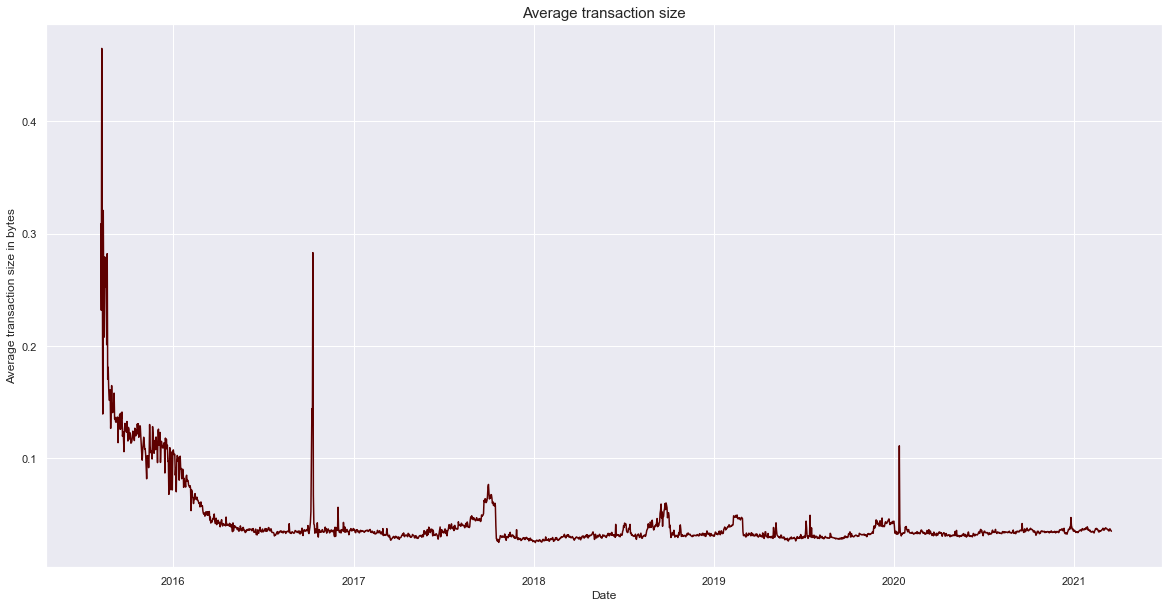

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Average transaction size", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Average transaction size in bytes")
ax.plot(dataBlockSizeAndTx["Date(UTC)"], dataBlockSizeAndTx["TransactionSize"], color="#5e0000")

# Amount of gas used per day

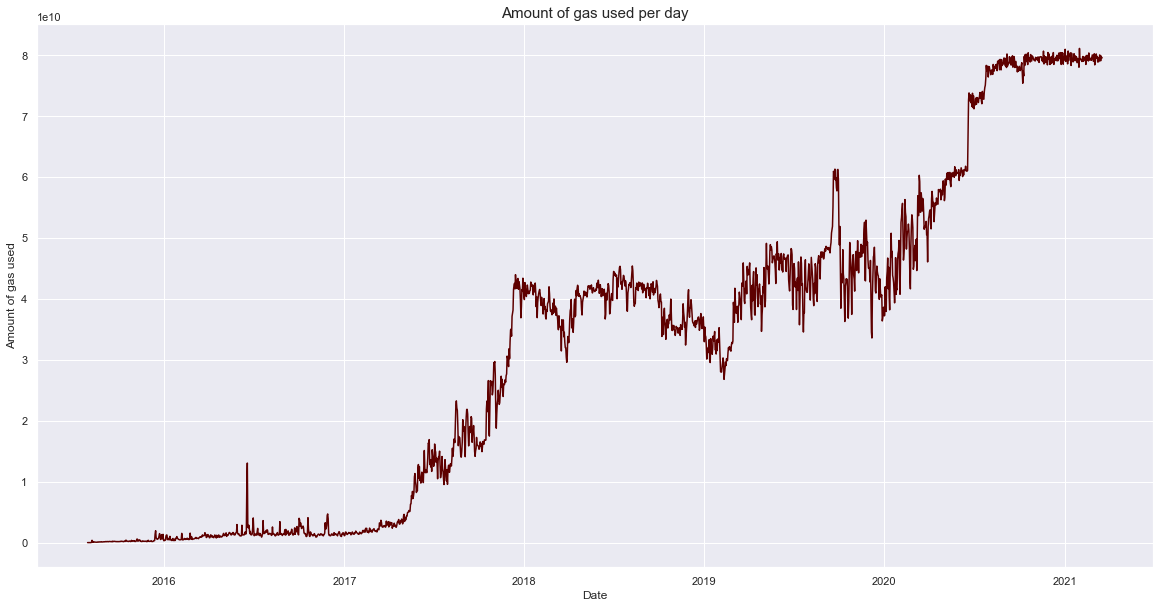

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("Amount of gas used per day", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Amount of gas used")
ax.plot(dataGasUsed["Date(UTC)"], dataGasUsed["Value"], color="#5e0000")

# Amount of gas per transaction

In [56]:
dataGasUsedAndTx = pd.merge(dataGasUsed, dataTxGrowth, on=["Date(UTC)"])
dataGasUsedAndTx = dataGasUsedAndTx.drop(["UnixTimeStamp_x","UnixTimeStamp_y"], "columns")
dataGasUsedAndTx.columns = ["Date(UTC)", "GasUsed", "TxCount"]

In [146]:
dataGasUsedAndTx["GasPerTransaction"] = dataGasUsedAndTx["GasUsed"] / dataGasUsedAndTx["TxCount"]
windowedAverageGasUsedPerTx = dataGasUsedAndTx["GasPerTransaction"].rolling(150).mean()

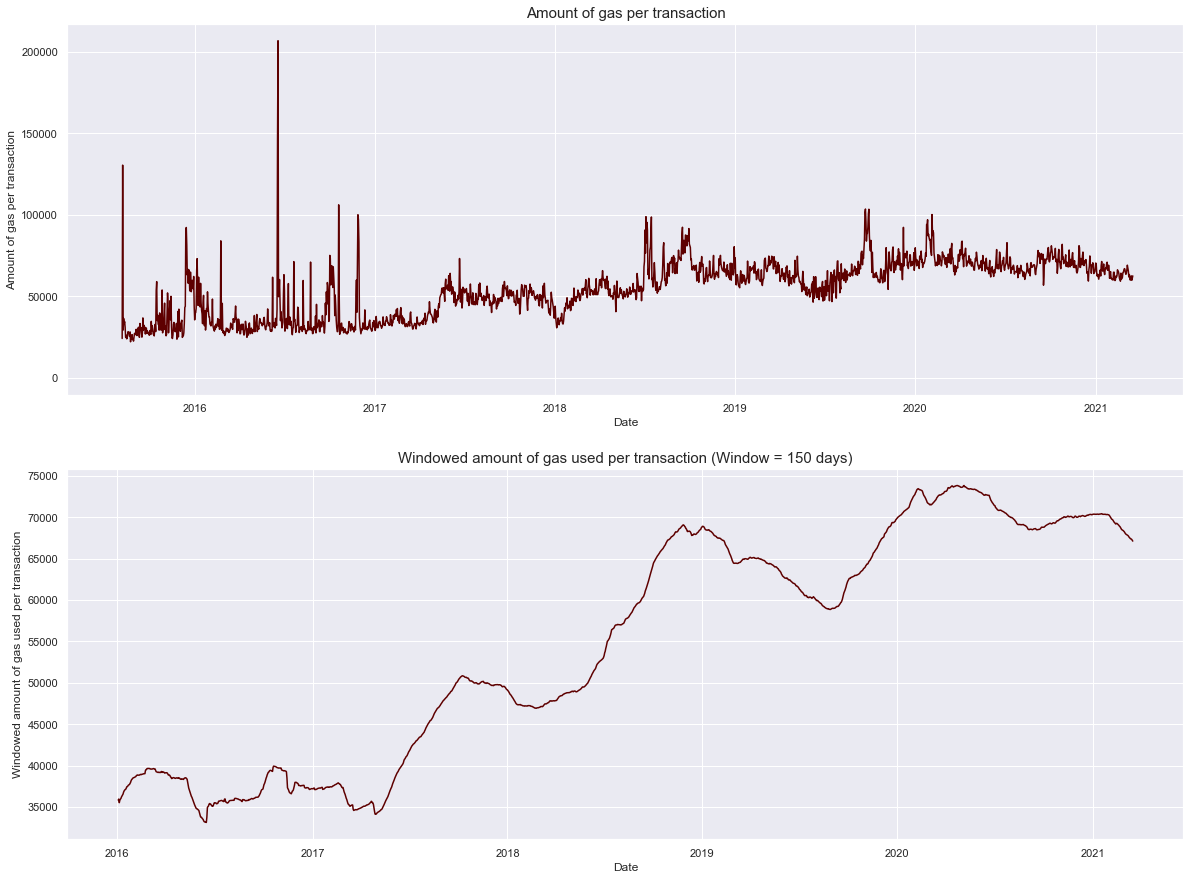

In [148]:
fig, axs = plt.subplots(2, figsize=(20,15))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[0].set_title("Amount of gas per transaction", fontsize=15)
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Amount of gas per transaction")
axs[0].plot(dataGasUsedAndTx["Date(UTC)"], dataGasUsedAndTx["GasPerTransaction"], color="#5e0000")

axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[1].set_title("Windowed amount of gas used per transaction (Window = 150 days)", fontsize=15)
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Windowed amount of gas used per transaction")
axs[1].plot(dataGasUsedAndTx["Date(UTC)"], windowedAverageGasUsedPerTx, color="#5e0000")